In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Markdown, Math

In [ ]:
#new coord system

In [761]:
a, beta, t, t2 = sp.symbols("a \\beta t t^'")
Om = sp.symbols("\Omega", real = True, positive = True)

R_A = sp.Function("R_{A}")(t)
R_B = sp.Function("R_{B}")()
R_C = sp.Function("R_{C}")(t)

#converts from F_lab to F_rot Om*t
RA = sp.Matrix([[1, 0, 0 ], 
                [0, sp.cos(Om*t), sp.sin(Om*t) ], 
                [0, -sp.sin(Om*t), sp.cos(Om*t)] ])
display(sp.Eq(R_A, RA, evaluate=False))

#converts from F_Rot to F_rot2
RB = sp.Matrix([[sp.cos(beta), -sp.sin(beta), 0], 
                [sp.sin(beta),  sp.cos(beta), 0], 
                [0, 0, 1 ]])
display(sp.Eq(R_B, RB, evaluate=False))

#converts from F_rot2 to F_rot3 a*t
RC = sp.Matrix([[sp.cos(a*t), 0, sp.sin(a*t)], 
                 [0,1,0],
                [-sp.sin(a*t),0, sp.cos(a*t)] ])
display(sp.Eq(R_C, RC, evaluate=False))

#quick check that these are proper rotation matrices
# display(sp.simplify(RC.inv()), RC.T)

Eq(R_{A}(t), Matrix([
[1,              0,             0],
[0,  cos(\Omega*t), sin(\Omega*t)],
[0, -sin(\Omega*t), cos(\Omega*t)]]))

Eq(R_{B}(), Matrix([
[cos(\beta), -sin(\beta), 0],
[sin(\beta),  cos(\beta), 0],
[         0,           0, 1]]))

Eq(R_{C}(t), Matrix([
[ cos(a*t), 0, sin(a*t)],
[        0, 1,        0],
[-sin(a*t), 0, cos(a*t)]]))

In [785]:
P0 = sp.symbols("P_0")
P0FR2 = sp.symbols("P_0|F_{rot2}")
P0FR3 = sp.symbols("P_0|F_{rot3}")

#P(t=0) in the lab frame - only one static component
P_0_Flab = sp.Matrix([0,P0,0])
display(sp.Eq(P0, P_0_Flab, evaluate=False))

#switch frames - with t=0 for the rotation matrices I think
P_0_FR3 = sp.simplify(RC.replace(t, 0)*RB*RA.replace(t, 0)*P_0_Flab)

display(sp.Eq(P0FR3, P_0_FR3, evaluate=False))

Eq(P_0, Matrix([
[  0],
[P_0],
[  0]]))

Eq(P_0|F_{rot3}, Matrix([
[-P_0*sin(\beta)],
[ P_0*cos(\beta)],
[              0]]))

In [797]:
#now we have P(t=0) in the second rotating frame where we can solve the bloch
#equation trivially
PFR2 = sp.Function("P_{rot2}")(t)
P_t_FR2 = sp.simplify(RC.T*P_0_FR3)
display(sp.Eq(PFR2, P_t_FR2, evaluate=False))

PFR1 = sp.Function("P_{rot}")(t)
P_t_FR1 = sp.simplify(RB.T*P_t_FR2)
display(sp.Eq(PFR1, P_t_FR1, evaluate=False))
# print(sp.latex(P_t_FR1))

#and the final transformation to the lab frame
Plab = sp.Function("P_{lab}")(t)
P_t_FRLab = sp.simplify(RA.T*P_t_FR1)

display(sp.Eq(Plab, P_t_FRLab, evaluate=False))
print(sp.latex(P_t_FRLab))

Eq(P_{rot2}(t), Matrix([
[-P_0*sin(\beta)*cos(a*t)],
[          P_0*cos(\beta)],
[-P_0*sin(\beta)*sin(a*t)]]))

Eq(P_{rot}(t), Matrix([
[    P_0*(1 - cos(a*t))*sin(\beta)*cos(\beta)],
[P_0*(sin(\beta)**2*cos(a*t) + cos(\beta)**2)],
[                    -P_0*sin(\beta)*sin(a*t)]]))

Eq(P_{lab}(t), Matrix([
[                                                        P_0*(1 - cos(a*t))*sin(\beta)*cos(\beta)],
[P_0*((sin(\beta)**2*cos(a*t) + cos(\beta)**2)*cos(\Omega*t) + sin(\beta)*sin(\Omega*t)*sin(a*t))],
[P_0*((sin(\beta)**2*cos(a*t) + cos(\beta)**2)*sin(\Omega*t) - sin(\beta)*sin(a*t)*cos(\Omega*t))]]))

\left[\begin{matrix}P_{0} \left(1 - \cos{\left(a t \right)}\right) \sin{\left(\beta \right)} \cos{\left(\beta \right)}\\P_{0} \left(\left(\sin^{2}{\left(\beta \right)} \cos{\left(a t \right)} + \cos^{2}{\left(\beta \right)}\right) \cos{\left(\Omega t \right)} + \sin{\left(\beta \right)} \sin{\left(\Omega t \right)} \sin{\left(a t \right)}\right)\\P_{0} \left(\left(\sin^{2}{\left(\beta \right)} \cos{\left(a t \right)} + \cos^{2}{\left(\beta \right)}\right) \sin{\left(\Omega t \right)} - \sin{\left(\beta \right)} \sin{\left(a t \right)} \cos{\left(\Omega t \right)}\right)\end{matrix}\right]


In [787]:
#testing Jeff's solution instead
# P_t_FRLab = sp.Matrix([ P0*sp.sin(beta)*sp.cos(beta)*(sp.cos(a*t)-1),
#     P0*(sp.cos(Om*t)*(sp.sin(beta)**2*sp.cos(a*t)+sp.cos(beta)**2) + sp.sin(beta)*sp.sin(a*t)*sp.sin(Om*t)),
#     P0*(-sp.sin(Om*t)*(sp.sin(beta)**2*sp.cos(a*t)+sp.cos(beta)**2) + sp.sin(beta)*sp.sin(a*t)*sp.cos(Om*t))   
#                       ])
# P_t_FRLab

In [788]:
wL = sp.symbols("\omega_L")
a_sub = sp.sqrt(wL**2 + Om**2)

cos_b = -wL/a_sub
sin_b = Om/a_sub

print("Sub:")
display(sp.Eq(sp.cos(beta), cos_b, evaluate=False), sp.Eq(sp.sin(beta), sin_b, evaluate=False))

P_t_FRLab_betasub = sp.simplify(P_t_FRLab.replace(sp.cos(beta), cos_b).replace(sp.sin(beta), sin_b))

display(sp.Eq(Plab, P_t_FRLab_betasub, evaluate=False))

Sub:


Eq(cos(\beta), -\omega_L/sqrt(\Omega**2 + \omega_L**2))

Eq(sin(\beta), \Omega/sqrt(\Omega**2 + \omega_L**2))

Eq(P_{lab}(t), Matrix([
[                                                                                                                    P_0*\Omega*\omega_L*(cos(a*t) - 1)/(\Omega**2 + \omega_L**2)],
[ P_0*(\Omega*(\Omega**2 + \omega_L**2)*sin(\Omega*t)*sin(a*t) + sqrt(\Omega**2 + \omega_L**2)*(\Omega**2*cos(a*t) + \omega_L**2)*cos(\Omega*t))/(\Omega**2 + \omega_L**2)**(3/2)],
[-P_0*(\Omega*(\Omega**2 + \omega_L**2)*sin(a*t)*cos(\Omega*t) - sqrt(\Omega**2 + \omega_L**2)*(\Omega**2*cos(a*t) + \omega_L**2)*sin(\Omega*t))/(\Omega**2 + \omega_L**2)**(3/2)]]))

In [789]:
P_t_FRLab_Asub = sp.simplify(P_t_FRLab_betasub.replace(a, a_sub))

display(sp.Eq(Plab, P_t_FRLab_Asub, evaluate=False))

Eq(P_{lab}(t), Matrix([
[                                                                                                                                                P_0*\Omega*\omega_L*(cos(t*sqrt(\Omega**2 + \omega_L**2)) - 1)/(\Omega**2 + \omega_L**2)],
[ P_0*(\Omega*(\Omega**2 + \omega_L**2)*sin(\Omega*t)*sin(t*sqrt(\Omega**2 + \omega_L**2)) + sqrt(\Omega**2 + \omega_L**2)*(\Omega**2*cos(t*sqrt(\Omega**2 + \omega_L**2)) + \omega_L**2)*cos(\Omega*t))/(\Omega**2 + \omega_L**2)**(3/2)],
[-P_0*(\Omega*(\Omega**2 + \omega_L**2)*sin(t*sqrt(\Omega**2 + \omega_L**2))*cos(\Omega*t) - sqrt(\Omega**2 + \omega_L**2)*(\Omega**2*cos(t*sqrt(\Omega**2 + \omega_L**2)) + \omega_L**2)*sin(\Omega*t))/(\Omega**2 + \omega_L**2)**(3/2)]]))

now use $a=\sqrt{ \Omega^2 +\omega_L^2} = \Omega\sqrt{1+k^2}$ and $k = \omega_L/\Omega$

In [790]:
k = sp.symbols("k", real = True, positive=True)
a_sub = Om*sp.sqrt(1 + k**2)
sqrt = Om**2*(1 + k**2)

P_t_FRLab_k1 = sp.simplify(P_t_FRLab_betasub.replace(a, a_sub).replace((Om**2+wL**2), sqrt))
P_t_FRLab_k = sp.simplify(P_t_FRLab_k1.replace(wL, k*Om))

display(sp.Eq(Plab, P_t_FRLab_k, evaluate=False))

Eq(P_{lab}(t), Matrix([
[                                                                                               P_0*k*(cos(\Omega*t*sqrt(k**2 + 1)) - 1)/(k**2 + 1)],
[P_0*(sqrt(k**2 + 1)*(k**2 + cos(\Omega*t*sqrt(k**2 + 1)))*cos(\Omega*t) + (k**2 + 1)*sin(\Omega*t)*sin(\Omega*t*sqrt(k**2 + 1)))/(k**2 + 1)**(3/2)],
[P_0*(sqrt(k**2 + 1)*(k**2 + cos(\Omega*t*sqrt(k**2 + 1)))*sin(\Omega*t) - (k**2 + 1)*sin(\Omega*t*sqrt(k**2 + 1))*cos(\Omega*t))/(k**2 + 1)**(3/2)]]))

Now we know $t=\theta / \Omega$

In [799]:
the = sp.symbols("\\theta")
Plab_k = sp.Function("P_{lab}")(k, the)

t_sub = the/Om

P_t_FRLab_theta = sp.simplify(P_t_FRLab_k.replace(t, t_sub))

display(sp.Eq(Plab_k, P_t_FRLab_theta, evaluate=False))
# print(sp.latex(P_t_FRLab_theta))

Eq(P_{lab}(k, \theta), Matrix([
[                                                                                         P_0*k*(cos(\theta*sqrt(k**2 + 1)) - 1)/(k**2 + 1)],
[P_0*(sqrt(k**2 + 1)*(k**2 + cos(\theta*sqrt(k**2 + 1)))*cos(\theta) + (k**2 + 1)*sin(\theta)*sin(\theta*sqrt(k**2 + 1)))/(k**2 + 1)**(3/2)],
[P_0*(sqrt(k**2 + 1)*(k**2 + cos(\theta*sqrt(k**2 + 1)))*sin(\theta) - (k**2 + 1)*sin(\theta*sqrt(k**2 + 1))*cos(\theta))/(k**2 + 1)**(3/2)]]))

In [792]:
# q = sp.symbols("q")
# P_t_FRLab_theta.replace(Om, q)
#check for theta = 0
display(sp.simplify(P_t_FRLab_theta.replace(the, 0)))

Matrix([
[  0],
[P_0],
[  0]])

Setting $\theta = \frac{\pi}{2}$

In [801]:
P_t_FRLab_90 = sp.simplify(P_t_FRLab_theta.replace(the, sp.pi/2))

display(sp.Eq(Plab_k.replace(the, sp.pi/2), P_t_FRLab_90, evaluate=False))
print(sp.latex(P_t_FRLab_90))

Eq(P_{lab}(k, pi/2), Matrix([
[ P_0*k*(cos(pi*sqrt(k**2 + 1)/2) - 1)/(k**2 + 1)],
[     P_0*sin(pi*sqrt(k**2 + 1)/2)/sqrt(k**2 + 1)],
[P_0*(k**2 + cos(pi*sqrt(k**2 + 1)/2))/(k**2 + 1)]]))

\left[\begin{matrix}\frac{P_{0} k \left(\cos{\left(\frac{\pi \sqrt{k^{2} + 1}}{2} \right)} - 1\right)}{k^{2} + 1}\\\frac{P_{0} \sin{\left(\frac{\pi \sqrt{k^{2} + 1}}{2} \right)}}{\sqrt{k^{2} + 1}}\\\frac{P_{0} \left(k^{2} + \cos{\left(\frac{\pi \sqrt{k^{2} + 1}}{2} \right)}\right)}{k^{2} + 1}\end{matrix}\right]


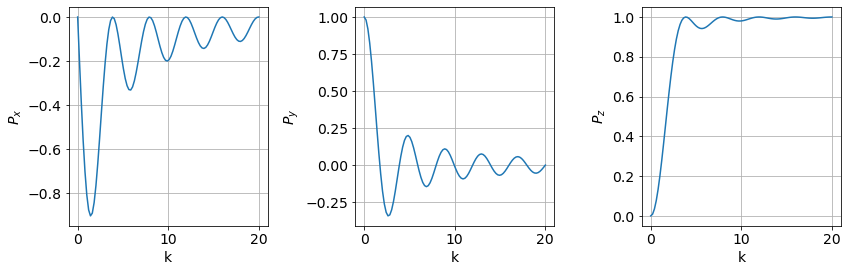

In [834]:
k_arr = np.linspace(0, 20, 100)
# print(k_arr)
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(1, 3, figsize=(12,4))

# f = lambdify(x, expr, 'numpy')
P_t_FRLab_1 = P_t_FRLab_90[0].replace(P0, 1)
# display(P_t_FRLab_1)
P_t_FRLab_funct = sp.lambdify(k, P_t_FRLab_1)
axs[0].plot(k_arr, P_t_FRLab_funct(k_arr))
axs[0].set_xlabel('k')
axs[0].set_ylabel('$P_x$')

P_t_FRLab_1 = P_t_FRLab_90[1].replace(P0, 1)
# display(P_t_FRLab_1)
P_t_FRLab_funct = sp.lambdify(k, P_t_FRLab_1)
axs[1].plot(k_arr, P_t_FRLab_funct(k_arr))
axs[1].set_xlabel('k')
axs[1].set_ylabel('$P_y$')

P_t_FRLab_1 = P_t_FRLab_90[2].replace(P0, 1)
P_t_FRLab_funct = sp.lambdify(k, P_t_FRLab_1)
axs[2].plot(k_arr, P_t_FRLab_funct(k_arr))
axs[2].set_xlabel('k')
axs[2].set_ylabel('$P_z$')

fig.tight_layout()
axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()

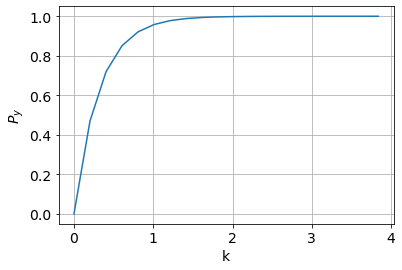

In [837]:
P_straight = lambda k: 1-np.exp(-np.pi*k)

plt.plot(k_arr[:20], P_straight(k_arr[:20]))
plt.xlabel('k')
plt.ylabel('$P_y$')
plt.grid()
plt.show()